This tutorial will walk you through how to perform basic supervised machine learning (ML) tasks on different types of data that might be relevent for various scientific applications. First we must generate some representative data.

# Generating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

/var/folders/qt/77s26v792bb5ds8p5mg6zlfcz8wz48/T/ipykernel_25854/455643528.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../../data/wind_plant_data.csv', index_col=0)
df

,Number Turbines,Min Spacing,Mean Spacing,Max Spacing,Mean Yaw,Area,Wind Speed,Turbulence Intensity,Plant Power
0,101,670.018230,686.289437,711.115568,14.231024,29999.693698,17.037330,0.06,342685150.0
1,30,572.189610,711.069882,4580.420321,15.366628,43555.045210,7.419972,0.10,41306132.0
2,188,551.135550,563.221870,585.298279,13.119190,36673.449866,7.465706,0.10,219382850.0
3,51,946.009287,988.496100,1443.696218,13.076939,31961.861139,7.783563,0.08,76887000.0
4,145,920.497087,966.386242,3570.228866,12.267640,130499.664906,8.310875,0.08,282136450.0
...,...,...,...,...,...,...,...,...,...
495,66,896.703745,928.485236,1120.879082,12.349686,134993.239543,14.808509,0.10,223933900.0
496,48,495.139972,510.926233,641.893910,11.084741,65524.054232,17.646877,0.10,162860260.0
497,106,477.713650,485.387822,502.884828,13.745361,45784.402922,10.865515,0.06,359359740.0
498,65,423.679689,437.288245,615.592615,12.497348,15140.131202,10.288083,0.08,171665260.0


In [3]:
input_names = [col for col in df.columns[:8]]
output_names = ['Plant Power']
print("Input parameters:", input_names)

Input parameters: ['Number Turbines', 'Min Spacing', 'Mean Spacing', 'Max Spacing', 'Mean Yaw', 'Area', 'Wind Speed', 'Turbulence Intensity']


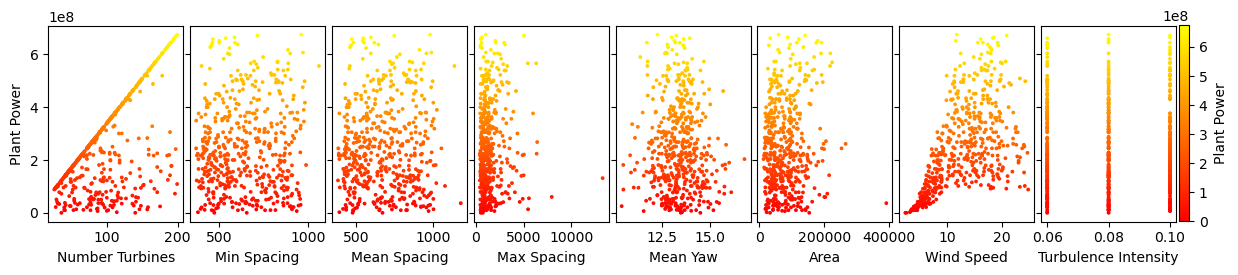

In [4]:
fig, ax = plt.subplots(1, 8, figsize=(12, 2.), sharey='row')
sm = plt.cm.ScalarMappable(cmap='autumn', norm=mpl.colors.Normalize(vmin=df[output_names].min(), vmax=df[output_names].max()))
for i, input in enumerate(input_names):
    ax[i].scatter(df[input], df[output_names], s=3, color=sm.to_rgba(df[output_names]))
    ax[i].set_xlabel(input)
ax[0].set_ylabel(output_names[0])
cax = plt.axes([0.78, 0.013, 0.25, 0.98])
cax.axis('off')
cbar = fig.colorbar(sm, ax=cax,)
# cbar.ax.tick_params(labelsize=11)
cbar.ax.set_ylabel(output_names[0], rotation=90, labelpad=5)
fig.subplots_adjust(left=0.05, right=0.99, wspace=0.05, bottom=0.01, top=0.99)

# Preprocessing the data
Most ML problems optimally operate on data that is normalized. The type optimal type of normalization depends upon the structure of the data and the desired output.

For this data we will use a rather standard that shifts and scales the data to a distribution centered around 0 with standard deviation equal to 1.

$$ x' = \frac{x - \mu(x)}{\sigma(x)}$$

It is often useful to also create an inverse normalization function which can be used to convert the ML model predictions back to the physical space.

In [5]:
x = df[input_names].to_numpy()  
scaler_x = preprocessing.StandardScaler().fit(x)
x_norm = scaler_x.transform(x)

y = df[output_names].to_numpy().reshape(-1, 1)
scaler_y = preprocessing.StandardScaler().fit(y)
y_norm = scaler_y.transform(y)

n_samples, n_feats = x_norm.shape
print(f"X.shape:{x_norm.shape}")
print(f"y.shape:{y_norm.shape}")


X.shape:(500, 8)
y.shape:(500, 1)


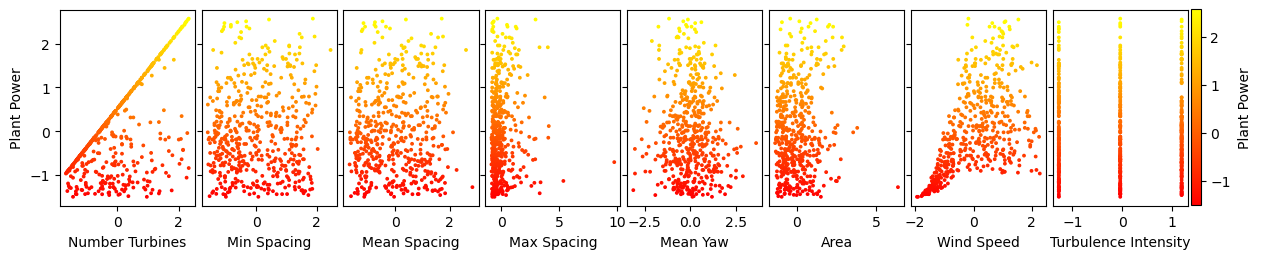

In [6]:
fig, ax = plt.subplots(1, 8, figsize=(12, 2.), sharey='row')
sm = plt.cm.ScalarMappable(cmap='autumn', norm=mpl.colors.Normalize(vmin=y_norm.min(), vmax=y_norm.max()))
for i, input in enumerate(input_names):
    ax[i].scatter(x_norm[:, i], y_norm, s=3, color=sm.to_rgba(y_norm))
    ax[i].set_xlabel(input)
ax[0].set_ylabel(output_names[0])
cax = plt.axes([0.78, 0.013, 0.25, 0.98])
cax.axis('off')
cbar = fig.colorbar(sm, ax=cax,)
# cbar.ax.tick_params(labelsize=11)
cbar.ax.set_ylabel(output_names[0], rotation=90, labelpad=5)
fig.subplots_adjust(left=0.05, right=0.99, wspace=0.05, bottom=0.01, top=0.99)

In [7]:
# Ensure numpy arrays are in float32, not float64
x_norm = np.float32(x_norm)
y_norm = np.float32(y_norm)

# Generate train and test datasets with 8-20 split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.20, random_state=42)
# Further split the test set into a validation set (final split is 80-10-10)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# precompute the unnormalized versions of y
y_train_real = scaler_y.inverse_transform(y_train)
y_val_real = scaler_y.inverse_transform(y_val)
y_test_real = scaler_y.inverse_transform(y_test)

# Creating a ML Model
Now that the data is preprocessed nicely, let's create a standard feed-forward neural network and train it to learn the relationship between the features (x) and the output (y).

The initial model will be have an input layer, three hidden layer with the number of neurons defined by the `width` variable, and an output layer.

The number of hidden layers, neurons per layer, and a variety of other "hyperparameters" will have a noticable impact on model results. These values can require extensive tuning depending on the problem at hand.

In [8]:
# Import PyTorch and related modules
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchinfo import summary

# Create a class for the PyTorch model
class ANN(nn.Module):
    def __init__(self, num_feat, width, **kwargs):
        super(ANN, self).__init__(**kwargs)

        self.num_feat = num_feat
        self.width = width
        
        # One Dense layer connecting inputs to bulk layers
        self.dense_layer_in = nn.Linear(self.num_feat, self.width)
        # Bulk layers
        self.bulk1 = nn.Linear(self.width, self.width)
        self.bulk2 = nn.Linear(self.width, self.width)
        self.bulk3 = nn.Linear(self.width, self.width)
        # Output layer with one feature
        self.output_layer = nn.Linear(self.width, 1)
        

    def forward(self, inputs):
        x = inputs

        x = self.dense_layer_in(x)
        x = F.relu(x)

        x = self.bulk1(x)
        x = F.relu(x)
        x = self.bulk2(x)
        x = F.relu(x)
        x = self.bulk3(x)
        x = F.relu(x)

        x = self.output_layer(x)
        return x


# Set some model parameters
width = 8
learning_rate = 1e-3

model = ANN(num_feat=n_feats, width=width)
print(summary(model, input_size=(1, n_feats)))

# Define the loss function and optimizer for training
criterion = nn.MSELoss(reduction="sum")
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Layer (type:depth-idx)                   Output Shape              Param #
ANN                                      [1, 1]                    --
├─Linear: 1-1                            [1, 8]                    72
├─Linear: 1-2                            [1, 8]                    72
├─Linear: 1-3                            [1, 8]                    72
├─Linear: 1-4                            [1, 8]                    72
├─Linear: 1-5                            [1, 1]                    9
Total params: 297
Trainable params: 297
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


In [9]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32

# Create the data holder for training/validation (the test set should be held separate from any model training)
dataset = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
dataset_val = TensorDataset(torch.from_numpy(x_val), torch.from_numpy(y_val))

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=True)

In [10]:
# Set some parameters for the learning loop
width = 8
num_epochs = 200
l1_norm = 0.0
l2_norm = 0.0
# l2_norm = 1e-3
learning_rate = 1e-3

# Make a history dict for storing metrics
history = {"loss": [], "val_loss": []}

# Instantiate the model
model = ANN(num_feat=n_feats, width=width)

# Define the loss function and optimizer for training
criterion = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
# Now we can train the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    val_loss = 0.0
    
    for idx, data in enumerate(dataloader):
        xin, y_truth = data

        # Clear previous gradients
        optimizer.zero_grad()
        
        # forward pass and compute loss
        pred = model(xin)
        loss = criterion(pred, y_truth)

        # add L1 regularization
        l1_reg = torch.tensor(0., requires_grad=True)
        for name, param in model.named_parameters():
            if 'weight' in name:
                l1_reg = l1_reg + torch.norm(param, 1)
        loss = loss + l1_norm * l1_reg

        # add L2 regularization
        l2_reg = torch.tensor(0., requires_grad=True)
        for name, param in model.named_parameters():
            if 'weight' in name:
                l2_reg = l2_reg + torch.norm(param, 2)
        loss = loss + l2_norm * l2_reg

        # Zero out the gradients, perform a backward pass, and update weights
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item() - (l2_norm * l2_reg).item()  - (l1_norm * l1_reg).item() 
    running_loss /= len(dataloader)

    # Compute the validation loss
    with torch.no_grad():
        for data_val in dataloader_val:
            xin_val, y_truth_val = data_val
            pred_val = model(xin_val)
            loss_val = criterion(pred_val, y_truth_val)
            val_loss += loss_val.item()
        val_loss /= len(dataloader_val)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch = {epoch+1}, loss = {running_loss}, val_loss = {val_loss}")
    history["loss"].append(running_loss)
    history["val_loss"].append(val_loss)

Epoch = 1, loss = 1.0120392579298754, val_loss = 0.8777529895305634
Epoch = 10, loss = 0.6320142356249002, val_loss = 0.4953281730413437
Epoch = 20, loss = 0.2074063500532737, val_loss = 0.27519576251506805
Epoch = 30, loss = 0.1301007024370707, val_loss = 0.17035213857889175
Epoch = 40, loss = 0.07580092807228749, val_loss = 0.10176590085029602
Epoch = 50, loss = 0.04671532058945069, val_loss = 0.06387348845601082
Epoch = 60, loss = 0.029573620082094118, val_loss = 0.042606063187122345
Epoch = 70, loss = 0.021761736904199306, val_loss = 0.0286940336227417
Epoch = 80, loss = 0.015525230349829564, val_loss = 0.021227392368018627
Epoch = 90, loss = 0.011908401663486775, val_loss = 0.016183356754481792
Epoch = 100, loss = 0.00928337062494113, val_loss = 0.01505821431055665
Epoch = 110, loss = 0.0076491330535365986, val_loss = 0.011518408544361591
Epoch = 120, loss = 0.006400553437952812, val_loss = 0.00929726636968553
Epoch = 130, loss = 0.0056928663801115295, val_loss = 0.008717085933312

## Training the ML Model

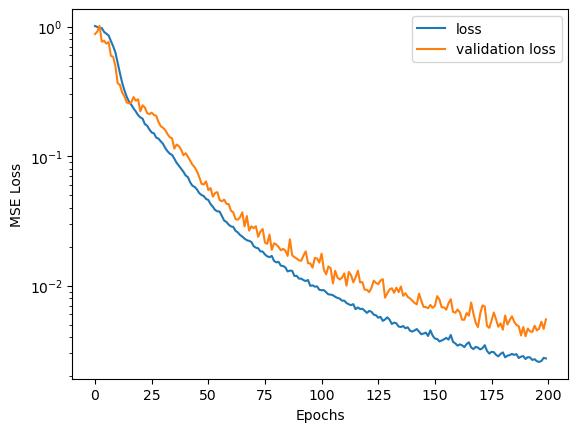

In [12]:
# Plot the loss function over time
fig, ax = plt.subplots(1, 1)
ax.semilogy(history["loss"], label="loss")
ax.semilogy(history["val_loss"], label="validation loss")
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE Loss")
plt.show()

In [13]:
# Evaluate the model performance on train and validation data
pred_norm = model(torch.from_numpy(x_norm)).detach().numpy()
pred_norm_train = model(torch.from_numpy(x_train)).detach().numpy()
pred_norm_val = model(torch.from_numpy(x_val)).detach().numpy()
pred_norm_test = model(torch.from_numpy(x_test)).detach().numpy()
# Unscale the results and plot
pred_full = scaler_y.inverse_transform(pred_norm)
pred_train = scaler_y.inverse_transform(pred_norm_train)
pred_val = scaler_y.inverse_transform(pred_norm_val)
pred_test = scaler_y.inverse_transform(pred_norm_test)

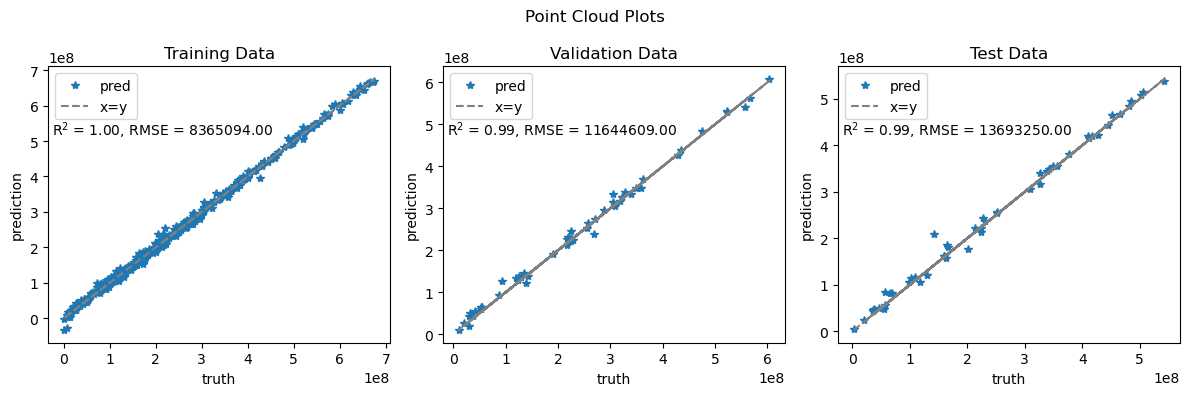

In [14]:
# Compute some statistics on the fit
from sklearn.metrics import mean_squared_error, r2_score
def pred_stats(pred, truth):
    r_sq = r2_score(truth, pred)
    rmse = np.sqrt(mean_squared_error(truth, pred))
    return r_sq, rmse
    
# Training data
r_sq_train, rmse_train = pred_stats(pred_train, y_train_real)
r_sq_val, rmse_val = pred_stats(pred_val, y_val_real)
r_sq_test, rmse_test = pred_stats(pred_test, y_test_real)

# Visualize the predictions using a cloud plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# Train plot
ax1.plot(y_train_real, pred_train, marker="*", linestyle="None", label="pred")
ax1.plot(y_train_real, y_train_real, linestyle="dashed", label="x=y", color="grey")
ax1.text(x=0.01, y=0.75, s=rf"R$^2$ = {r_sq_train:0.2f}, RMSE = {rmse_train:0.2f}", transform=ax1.transAxes)
ax1.legend()
ax1.set_xlabel("truth")
ax1.set_ylabel("prediction")
ax1.set_title("Training Data")
# Validation plot
ax2.plot(y_val_real, pred_val, marker="*", linestyle="None", label="pred")
ax2.plot(y_val_real, y_val_real, linestyle="dashed", label="x=y", color="grey")
ax2.text(x=0.01, y=0.75, s=rf"R$^2$ = {r_sq_val:0.2f}, RMSE = {rmse_val:0.2f}", transform=ax2.transAxes)
ax2.legend()
ax2.set_xlabel("truth")
ax2.set_ylabel("prediction")
ax2.set_title("Validation Data")
# Test plot
ax3.plot(y_test_real, pred_test, marker="*", linestyle="None", label="pred")
ax3.plot(y_test_real, y_test_real, linestyle="dashed", label="x=y", color="grey")
ax3.text(x=0.01, y=0.75, s=rf"R$^2$ = {r_sq_test:0.2f}, RMSE = {rmse_test:0.2f}", transform=ax3.transAxes)
ax3.legend()
ax3.set_xlabel("truth")
ax3.set_ylabel("prediction")
ax3.set_title("Test Data")

fig.suptitle('Point Cloud Plots')
fig.tight_layout()
plt.show()